In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from machine_failure_prediction.utils.paths import data_dir

INFORMATION ABOUT THE DATASET 
* Columns Description
* footfall: The number of people or objects passing by the machine.
* tempMode: The temperature mode or setting of the machine.
* AQ: Air quality index near the machine.
* USS: Ultrasonic sensor data, indicating proximity measurements.
* CS: Current sensor readings, indicating the electrical current usage of the machine.
* VOC: Volatile organic compounds level detected near the machine.
* RP: Rotational position or RPM (revolutions per minute) of the machine parts.
* IP: Input pressure to the machine.
* Temperature: The operating temperature of the machine.
* fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

In [4]:
df=pd.read_csv(data_dir("raw","machine_failure_data.csv"))

In [5]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [7]:
df.nunique()

footfall       99
tempMode        8
AQ              7
USS             7
CS              7
VOC             7
RP             71
IP              7
Temperature    24
fail            2
dtype: int64

The variables **`tempMode`**, **`AQ`**, **`USS`**, **`CS`**, **`VOC`**, and **`IP`** are considered categorical because they represent discrete levels or states rather than continuous quantities. Although they are in numeric format, their values indicate configurations (such as temperature mode or air quality levels) and do not have a meaningful order or continuous progression. Additionally, these columns have a limited number of unique values, reinforcing the interpretation that they are predefined categories or states within the system.

In [8]:
numerical=["footfall","Temperature"]
categorical=["tempMode","AQ","USS","CS","VOC","IP"]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [10]:
df.isna().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [11]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


We can identify columns with potential outliers by examining the difference between the maximum and mean values. For instance, the column footfall likely contains outliers, as it shows a significant gap between its maximum (7300) and mean (306.38).

In [12]:
df.fail.value_counts()

fail
0    551
1    393
Name: count, dtype: int64

The fail column shows an imbalance, with 551 instances labeled as 0 and 393 as 1. This imbalance means we have more data points for one label than the other, which could bias our models by training them more heavily on the majority class.

### Distribution

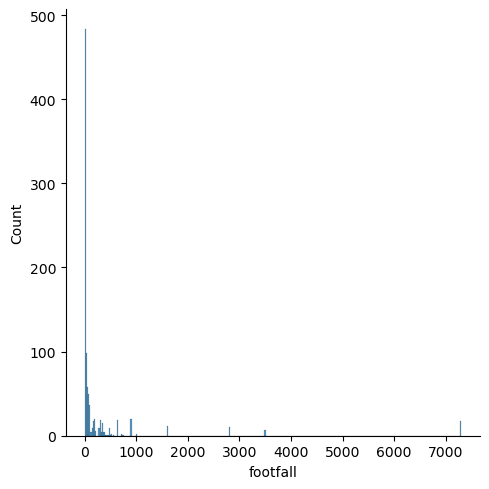

In [13]:
# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sns.displot(df['footfall'], kde=False)

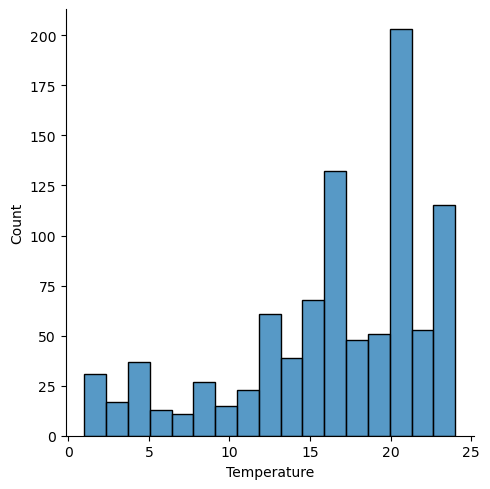

In [14]:
# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sns.displot(df['Temperature'], kde=False)

In [15]:
df['footfall']=df['footfall']+1

In [16]:
np.log10(df['footfall'].describe())

count    2.974972
mean     2.487678
std      3.034471
min      0.000000
25%      0.301030
50%      1.361728
75%      2.045323
max      3.863382
Name: footfall, dtype: float64

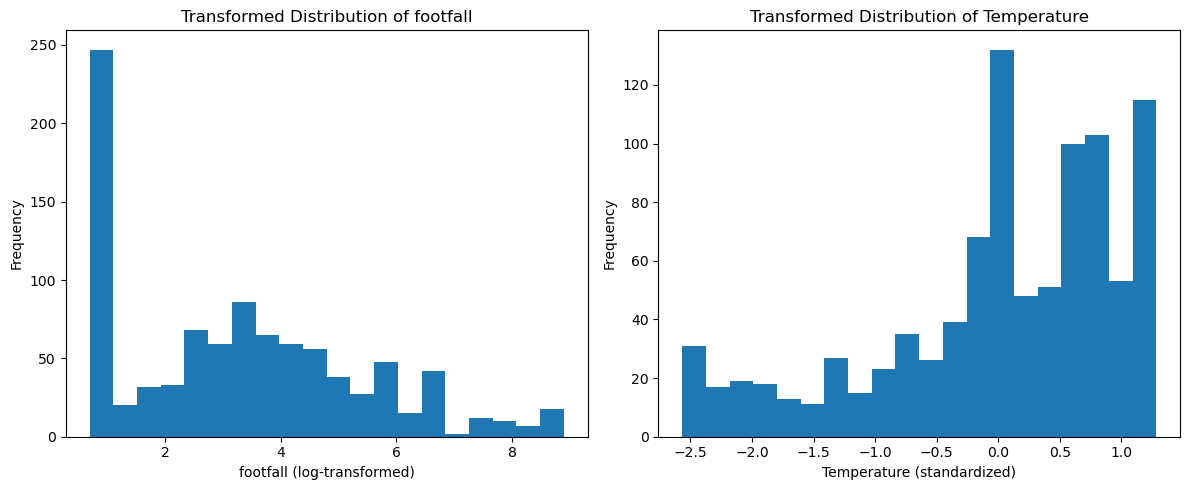

In [17]:
from sklearn.preprocessing import StandardScaler

# Applying transformations and scaling as recommended
# Log transformation for 'footfall' to reduce skewness
data_transformed = df.copy()
data_transformed['footfall'] = np.log1p(data_transformed['footfall'])

# Standard scaling for 'Temperature' to maintain structure
scaler = StandardScaler()
data_transformed['Temperature'] = scaler.fit_transform(data_transformed[['Temperature']])

# Display the transformed summary statistics to verify changes
data_transformed[['footfall', 'Temperature']].describe()
# Plotting the transformed distributions for footfall and Temperature
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot transformed distribution for footfall
axs[0].hist(data_transformed['footfall'], bins=20)
axs[0].set_title('Transformed Distribution of footfall')
axs[0].set_xlabel('footfall (log-transformed)')
axs[0].set_ylabel('Frequency')

# Plot transformed distribution for Temperature
axs[1].hist(data_transformed['Temperature'], bins=20)
axs[1].set_title('Transformed Distribution of Temperature')
axs[1].set_xlabel('Temperature (standardized)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Mutual information metric

In [18]:
from sklearn.metrics import mutual_info_score

In [19]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df.fail)

In [20]:
mi = df[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

VOC         0.403136
AQ          0.211640
USS         0.140197
CS          0.063571
tempMode    0.006499
IP          0.006162
dtype: float64

### Correlation

In [21]:
df_num = df.loc[:,numerical]
df_num.head()

,footfall,Temperature
0,1,1
1,191,1
2,32,1
3,84,1
4,641,1


In [22]:
df[numerical].corrwith(df.fail).abs()

footfall       0.073066
Temperature    0.190257
dtype: float64